##  Course project Module 3 part 1 for Machine Learning

## EPFL Extension School                                 

####  Data source : EPFL Extension School                                  
####  By Joker
- started: 19.04.2019
- finished: 20.04.2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge
from sklearn.metrics import mean_absolute_error as MAE
import warnings
sns.set_style("whitegrid")
%matplotlib inline

## Task 1

The first task consists of fitting the following equation to a set of 50 x/y data points using the polyfit() function from Numpy.

$$y=a\times log(x)+b$$


Perform the following steps:

- Fit the equation using polyfit() and print the a, b parameters.
- Plot your model with the 50 data points, i.e., the curve that corresponds to the equation from above.
- Compute and print the R2 coefficient using Numpy.
- Explain how the polyfit() function finds the optimal parameters (1-2 sentences)
- Give two differences between this method and the gradient descent one. Write a short sentence for each one.
- Write your solution to each point in a new code cell. You can use markdown cells for the last two points.

In [2]:
# Load data
df_1 = pd.read_csv('task-1.csv')

## Data exploration

In [3]:
# Data exploration - to know the data set
print('Shape: ',df_1.shape,'\n'); df_1.info(); df_1.head()

Shape:  (50, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
x    50 non-null float64
y    50 non-null float64
dtypes: float64(2)
memory usage: 880.0 bytes


,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


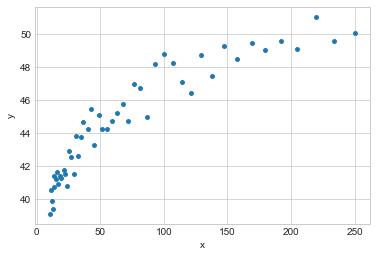

In [4]:
# Visualize data
plt.scatter(df_1['x'],df_1['y'], s=15);
# Arrange graphic
plt.xlabel('x');plt.ylabel('y');

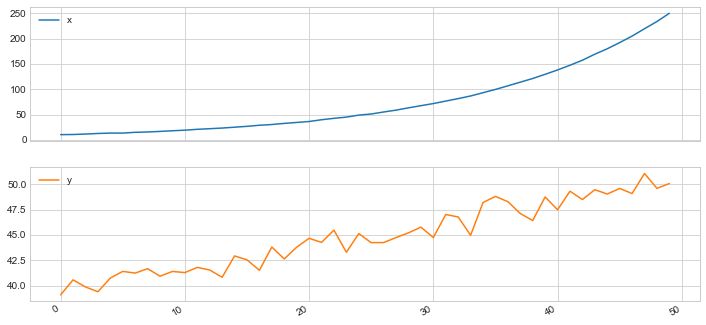

In [5]:
df_1.plot(subplots=True, sharex=True, figsize=(12,6));

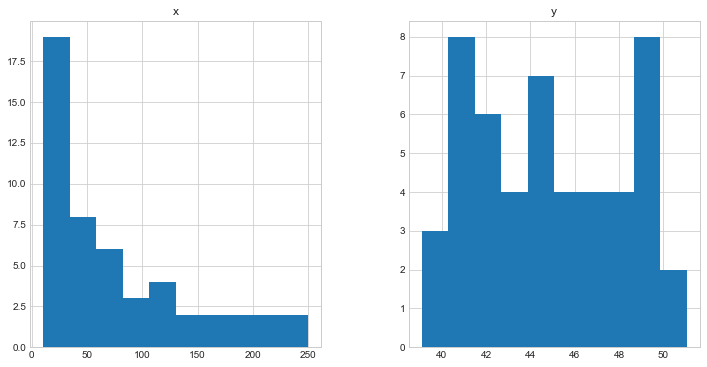

In [6]:
# Visualize data
df_1.hist(figsize=(12,6));

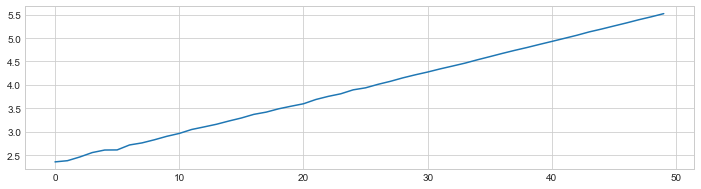

In [7]:
# Visualize x data transformed
np.log(df_1.x).plot(figsize=(12,3));

In [8]:
# Extract x and y
x1=df_1.x.values; y1=df_1.y.values
# Calculate coefficients a & b
coefs_1 = np.polyfit(np.log(x1),y1, deg=1); a1,b1 = coefs_1
print('a1 = {:.3f}     b1 = {:.3f}'.format(a1, b1))

a1 = 3.390     b1 = 31.529


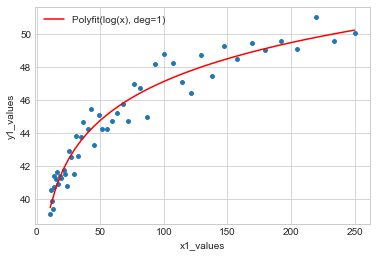

In [9]:
# Generate the x values and y values for the model with 50 data points
x1_values = np.linspace(min(x1),max(x1),num=50); y1_values = np.polyval(coefs_1,np.log(x1_values))
# Plot data and model
plt.scatter(x1, y1, s=15); plt.plot(x1_values,y1_values,label='Polyfit(log(x), deg=1)',c='r')
# Arrange graphic
plt.xlabel('x1_values');plt.ylabel('y1_values'); plt.legend();

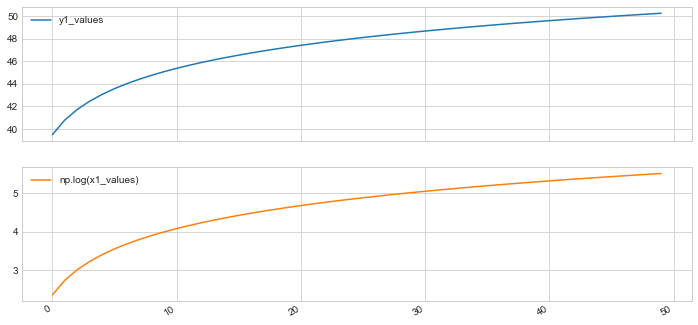

In [10]:
# Visualisation for my understanding of how the polyfit() applied to transformed data can still calculate correct coeficients
df2=pd.DataFrame()
df2['y1_values']=y1_values
df2['np.log(x1_values)']=np.log(x1_values)
#df2.head()
df2.plot(subplots=True, sharex=True, figsize=(12,6));

In [11]:
# Define RSS metric
def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))
# RSS of the baseline
rss_baseline1 = RSS(y1, np.mean(y1))
# RSS of the model
rss_model1 = RSS(y1, np.polyval(coefs_1, np.log(x1)))
# Score R2
R2_1 = 1 - (rss_model1 / rss_baseline1)
print('RSS baseline1: {:.1f}  RSS model1: {:.1f}  R2 Coefficient: {:.2f}' .format(rss_baseline1, rss_model1, R2_1))

RSS baseline1: 541.1  RSS model1: 31.8  R2 Coefficient: 0.94


#### Explain how the polyfit() function finds the optimal parameters

Polyfit() use a polynomial to model the relationship between the varaibles. In our case two variable x and y. After linearisation with log(x), a polynomial of degree 1 is enough to model the data. The sum of squared error is minimized by finding the right parameter a= slope, b=height of the polynomial.

#### Give two differences between this method and the gradient descent one.

- Gredient Descent is an iterative algorithm. It uses a Loss function (Cost function) and a learning rate to update the parameters.
- It works by taking small steps in the opposite sens of the gradient of the Cost function.

## Task 2
- In this second task, we ask you to fit a linear regression using Scikit-learn to a data set with three input features x1, x2, x3 and a target variable y.
- This time, the data contains outliers and your goal is to remove those extreme values before fitting the linear regression.

In [12]:
# Load data
df_2 = pd.read_csv('task-2.csv')

## Data exploration - to know the data set

In [13]:
# Data exploration - to know the data set
print('Shape: ',df_2.shape,'\n'); df_2.info(); df_2.head()

Shape:  (1000, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
x1    1000 non-null float64
x2    1000 non-null float64
x3    1000 non-null float64
y     1000 non-null float64
dtypes: float64(4)
memory usage: 31.3 KB


,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


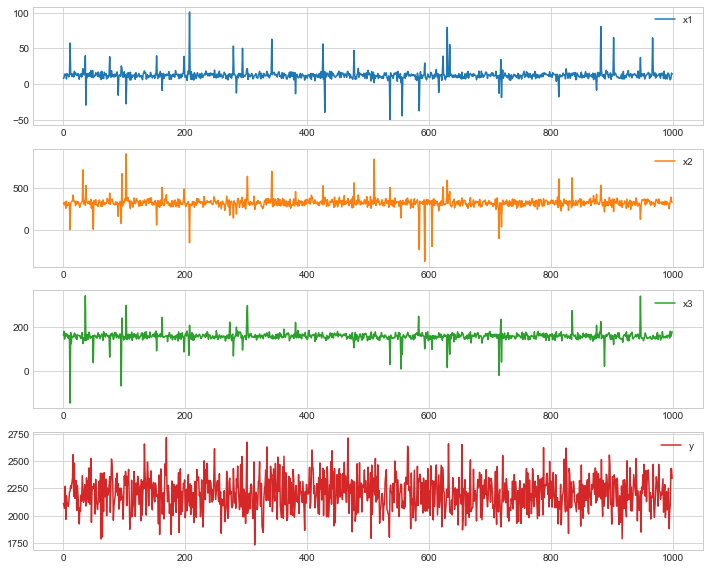

In [14]:
# Visualize data. All extrema pics are outliers
df_2.plot(subplots=True, sharex=False, figsize=(12,10));

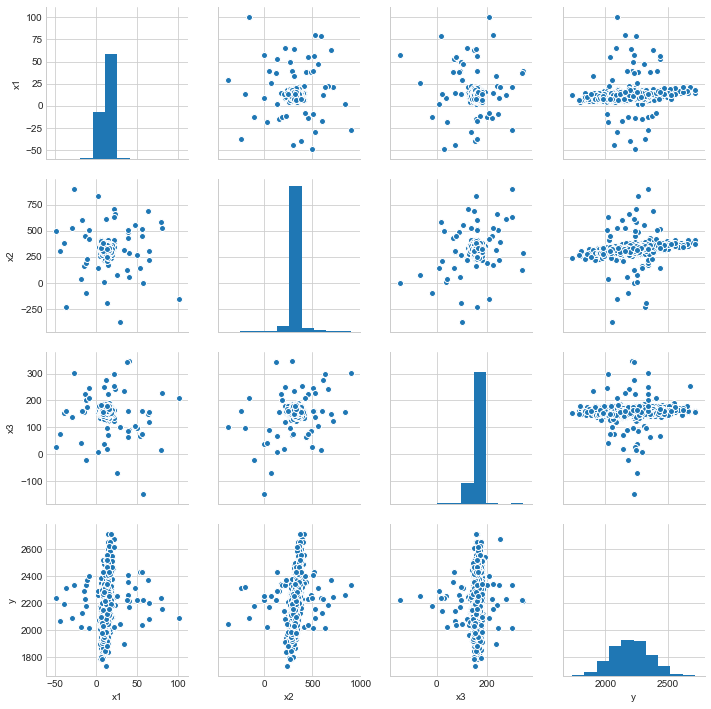

In [15]:
# Visualize data
sns.pairplot(df_2);

In [16]:
# Starts first with the outliers
train_df, test_df = train_test_split(df_2, train_size=0.8, random_state=0)
# Extract values for training
X_tr = train_df.drop('y', axis=1).values; y_tr = train_df.y.values
# Extract values for testing
X_te = test_df.drop('y', axis=1).values; y_te = test_df.y.values
print('Train DataFrame:{:}     Test DataFrame:{:}'.format(train_df.shape, test_df.shape))

Train DataFrame:(800, 4)     Test DataFrame:(200, 4)


C:\Users\Joker\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [17]:
# Linear regression
lr = LinearRegression(); lr.fit(X_tr,y_tr); y_pred1 = lr.predict(X_te); MAE_lr = MAE(y_te, y_pred1)
print('Coefficients:{:} Intercept:{:.2f}  MAE lr: {:.1f}'.format(lr.coef_, lr.intercept_, MAE_lr))

Coefficients:[ 3.18946219  0.72611244 -0.29586984] Intercept:1982.20  MAE lr: 104.8


In [18]:
# Removing Outliers
train_dfwo = train_df[(np.abs(stats.zscore(train_df)) < 2).all(axis=1)]
# Extract values for training without outlier
X_trwo = train_dfwo.drop('y', axis=1).values; y_trwo = train_dfwo.y.values

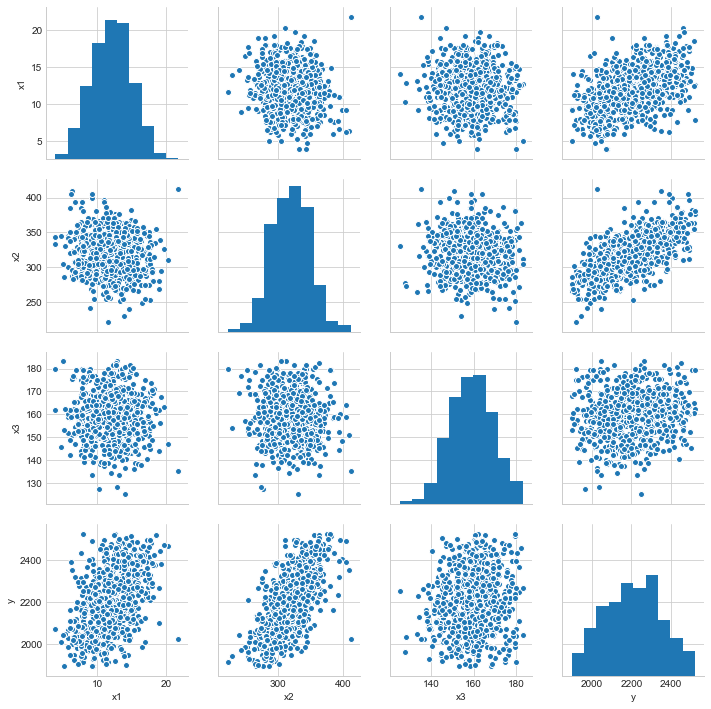

In [19]:
# Visualize data- check outliers filtering
sns.pairplot(train_dfwo);

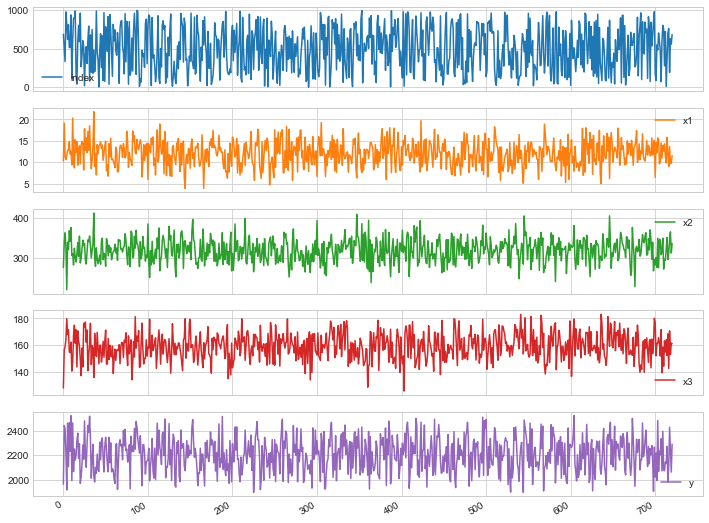

In [20]:
# Visualize data - check outliers filtering
# Reset index of train data set due to shuffling function intrinsic to train_test_split() 
train_dfwo=train_dfwo.reset_index();train_dfwo.plot(subplots=True, figsize=(12,10));

In [21]:
# Linear regression
lrwo = LinearRegression(); lrwo.fit(X_trwo,y_trwo); y_pred2 = lrwo.predict(X_te); MAE_lrwo = MAE(y_te, y_pred2)
print('Coefficients:{:} Intercept:{:.2f}  MAE lrwo: {:.1f}'.format(lr.coef_, lr.intercept_, MAE_lrwo))

Coefficients:[ 3.18946219  0.72611244 -0.29586984] Intercept:1982.20  MAE lrwo: 67.8


In [22]:
# Huber loss
huber = HuberRegressor(); huber.fit(X_tr, y_tr) ; y_pred_huber = huber.predict(X_te); MAE_huber= MAE(y_te, y_pred_huber) 
print('MAE Huber: {:.1f}'.format(MAE_huber))

MAE Huber: 83.9


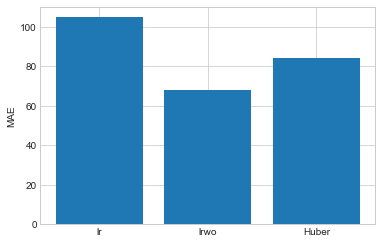

In [23]:
# Final comparison
MAE_values = [MAE_lr, MAE_lrwo, MAE_huber]; titles = ['lr', 'lrwo', 'Huber'];
# Arrange graphic
xcor = np.arange(len(MAE_values)); plt.bar(xcor, MAE_values);plt.xticks(xcor, titles);plt.ylabel('MAE');

## Task 3

- The goal of the third task is to fit a polynomial regression of degree 10 to the following set of 50 x/y data points. You will have to apply regularization to avoid overfitting.

Your code should include the following steps.

- Split data into 50-50 train/test sets using train_test_split(). Set the random_state to zero.
- Fit a polynomial of degree 10 to the train set. Print its residual sum of squares (RSS) on the train/test sets. Does your model overfit?
- Plot your model with the 50 data points, i.e., the curve that corresponds to your polynomial regression.
- Apply regularization using ridge regression. Tune the regularization strength using grid search.
- Compute the train/test RSS of your (tuned) ridge regression model and plot the new curve.

In [24]:
# Load data
df_3 = pd.read_csv('task-3.csv')

## Data exploration - to know the data set

In [25]:
# Data exploration - to know the data set
print('Shape: ',df_3.shape,'\n'); df_3.info(); df_3.head()

Shape:  (50, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
x    50 non-null float64
y    50 non-null float64
dtypes: float64(2)
memory usage: 880.0 bytes


,x,y
0,3.588,0.473
1,3.551,0.784
2,3.610,0.847
3,3.704,0.904
4,3.716,1.118


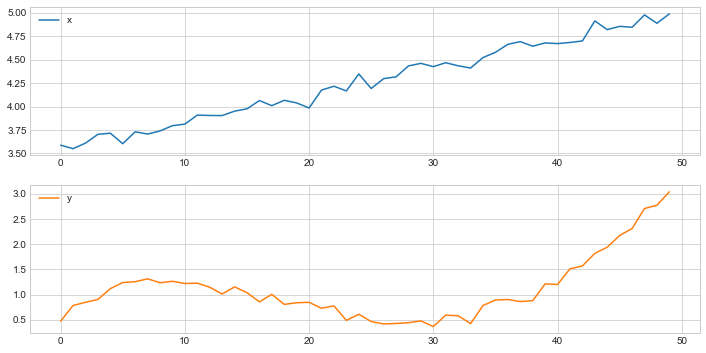

In [26]:
# Visualize data
df_3.plot(subplots=True, sharex=False, figsize=(12,6));

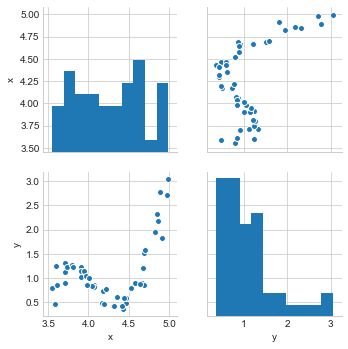

In [27]:
# Visualize data
sns.pairplot(df_3);

In [28]:
# Extract features and response
x3 = df_3.x.values
y3 = df_3.y.values
# Generate polynomial features
poly_obj = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_obj.fit_transform(x3[:,np.newaxis])
# Extract values for training & testing set
X3_tr, X3_te, y3_tr, y3_te = train_test_split(X_poly, y3, train_size=0.5, random_state=0)
print('X3_tr:{:}  X3_te:{:}  y3_tr:{:}  y3_te:{:}'.format(X3_tr.shape, X3_te.shape, y3_tr.shape, y3_te.shape))

X3_tr:(25, 10)  X3_te:(25, 10)  y3_tr:(25,)  y3_te:(25,)


C:\Users\Joker\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [29]:
# Linear regression
lr3 = LinearRegression(); lr3.fit(X3_tr, y3_tr); y3_tr_pred = lr3.predict(X3_tr); y3_te_pred = lr3.predict(X3_te)
# Evaluate RSS
print('RSS on our train data: {:.3f}     RSS on our test data: {:.3f}'.format(RSS(y3_tr,y3_tr_pred), RSS(y3_te,y3_te_pred)))
print('RSS train data << RSS test data -> Overfitting')

RSS on our train data: 0.684     RSS on our test data: 1.513
RSS train data << RSS test data -> Overfitting


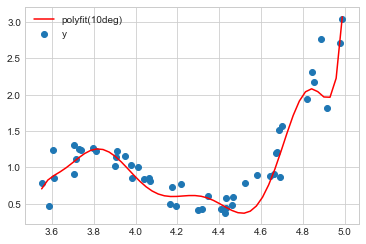

In [30]:
# Generate model
x_line = np.linspace(min(x3), max(x3), num=50)
x_line_poly = poly_obj.fit_transform(x_line[:,np.newaxis]); y3_model = lr3.predict(x_line_poly)
# Arrange graphic
plt.scatter(data = df_3, x='x', y='y')
plt.plot(x_line, y3_model, c='r', label='polyfit(10deg)'); plt.legend();

In [31]:
# Rige algorithm optimisation
alphas = np.logspace(-14,3,num=100)
# Save error on train/test sets
train_scores = []; test_scores = []
# Grid search
for alpha in alphas:
    # to mute the warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")    
        # Create and fit ridge regression
        ridge = Ridge(alpha=alpha); ridge.fit(X3_tr, y3_tr)
        # Performance on train set
        y3_tr_pred = ridge.predict(X3_tr);train_scores.append(RSS(y3_tr, y3_tr_pred))
        # Performance on test set
        y3_te_pred = ridge.predict(X3_te);test_scores.append(RSS(y3_te, y3_te_pred))

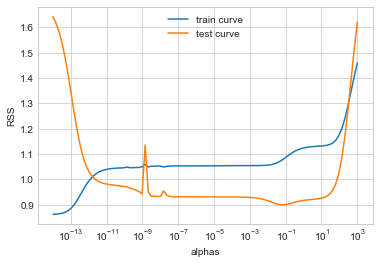

In [32]:
# Plot the validation curves
plt.semilogx(alphas, train_scores, label='train curve'); plt.xlabel('alphas')
plt.semilogx(alphas, test_scores, label='test curve');plt.ylabel('RSS');plt.legend();

In [33]:
# Retrive best alpha
idx = np.argmin(test_scores); best_alpha = alphas[idx]
print('Best alpha {:.2e}'.format(best_alpha))
# Print train/test scores
print('Ridge reg -> RSS train: {:.2f}   RSS test: {:.2f}'.format(train_scores[idx],test_scores[idx]))

Best alpha 7.56e-02
Ridge reg -> RSS train: 1.08   RSS test: 0.90


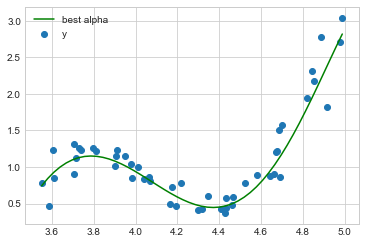

In [35]:
# Rige regression
ridge2 = Ridge(best_alpha);ridge2.fit(X3_tr, y3_tr)
# Plot model
x_line = np.linspace(min(x3), max(x3), num=50);X_line_poly = poly_obj.fit_transform(x_line[:, np.newaxis])
y_line = ridge2.predict(X_line_poly)
# Arrange graphic
plt.scatter(data=df_3, x='x', y='y');plt.plot(x_line, y_line, c='g', label='best alpha');plt.legend();

#### It was a great warm up !!! :) Thanks  